Assignment:

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.

Access this data using the Thinkful database using these credentials:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174' 
postgres_port = '5432'
postgres_db ='useducation'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from useducation', con= engine)
engine.dispose()

In [3]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [5]:
df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [6]:
filling_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states=df['STATE'].unique()
for state in states:
    df.loc[df['STATE']==state,filling_list]=df.loc[df['STATE']==state,filling_list].fillna(df.loc[df['STATE']==state,filling_list].interpolate())
    df.dropna(inplace=True)

In [7]:
df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

1.Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

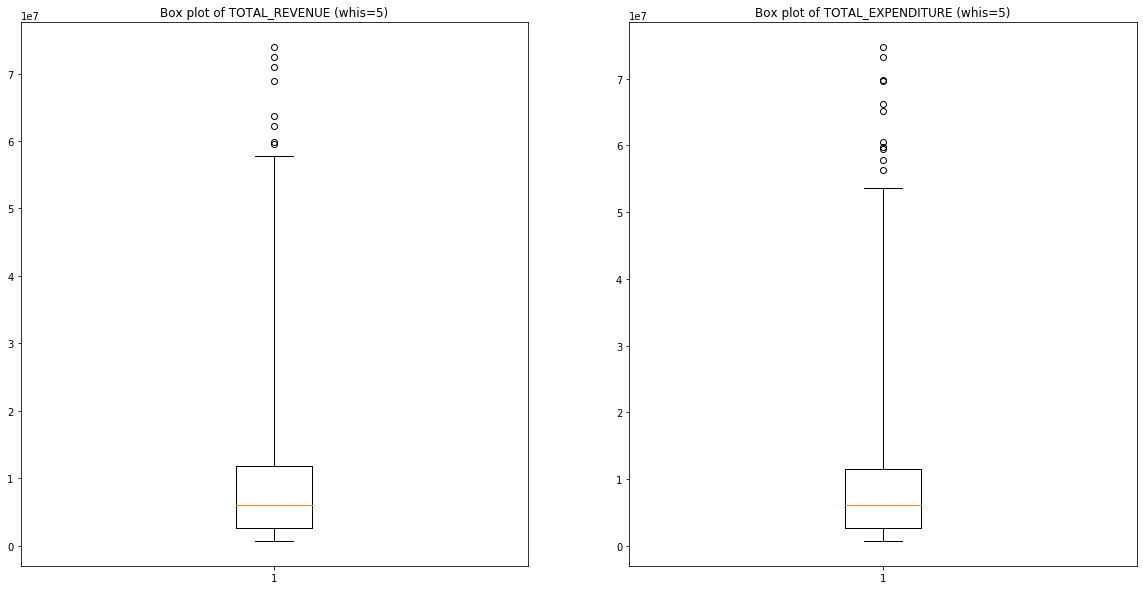

In [8]:
plt.figure(figsize= (20,10))

plt.subplot(1,2,1)
plt.boxplot(df["TOTAL_REVENUE"], whis=5)
plt.title("Box plot of TOTAL_REVENUE (whis=5)")


plt.subplot(1,2,2)
plt.boxplot(df["TOTAL_EXPENDITURE"], whis=5)
plt.title("Box plot of TOTAL_EXPENDITURE (whis=5)")

plt.show()

AS you can see in both boxplots, two variables have outlier.

2.If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [9]:

winsorized_revenue = winsorize(df["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(df["TOTAL_EXPENDITURE"], (0, 0.05))


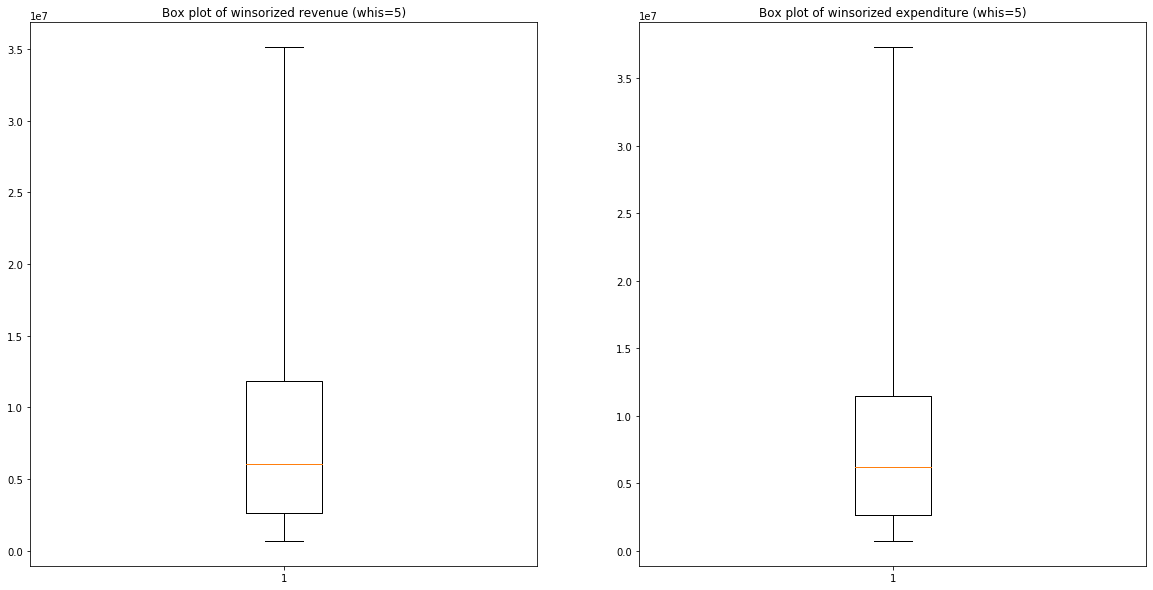

In [10]:
plt.figure(figsize= (20,10))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis=5 )
plt.title("Box plot of winsorized revenue (whis=5)")


plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis=5)
plt.title("Box plot of winsorized expenditure (whis=5)")

plt.show()

Using boxplot to check the outliers eliminated by winsorized.So, as you can see in both boxplots all outliers removed.

3.Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [11]:
 budget_deficit=(df['TOTAL_EXPENDITURE']-df['TOTAL_REVENUE'])

Text(0.5, 1.0, 'Box plot of  budget_deficit (whis=5)')

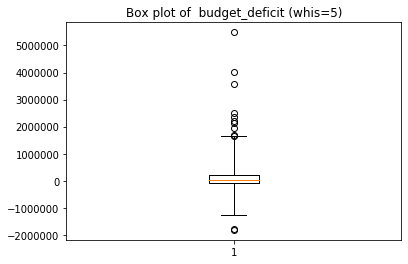

In [12]:
plt.boxplot(budget_deficit, whis=5)
plt.title("Box plot of  budget_deficit (whis=5)")

As you can see, it has outliers in both side.So, use winsorize to remove that.

In [13]:
winsorized_budgetdeficit = winsorize(budget_deficit, (0.05, 0.05))

Text(0.5, 1.0, 'Box plot of winsorized_budgetdeficit (whis=5)')

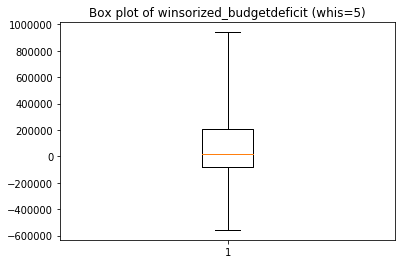

In [14]:
plt.boxplot(winsorized_budgetdeficit, whis=5)
plt.title("Box plot of winsorized_budgetdeficit (whis=5)")

All outliers removed by using winsorized.

4.Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [15]:
budget_deficit2 = winsorized_expenditure - winsorized_revenue 

Text(0.5, 1.0, 'Box plot of  budget_deficit2 (whis=5)')

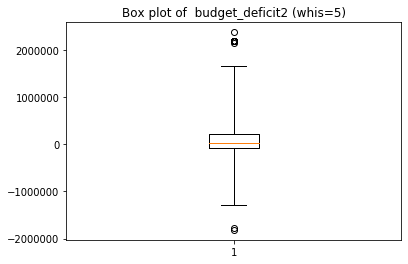

In [16]:
plt.boxplot(budget_deficit2, whis=5)
plt.title("Box plot of  budget_deficit2 (whis=5)")

As you can see, we have outliers in two side. So, use winsorize: 

In [17]:
winsorized_budgetdeficit2 = winsorize(budget_deficit2, (0.05, 0.05))

Text(0.5, 1.0, 'Box plot of winsorized_budgetdeficit (whis=5)')

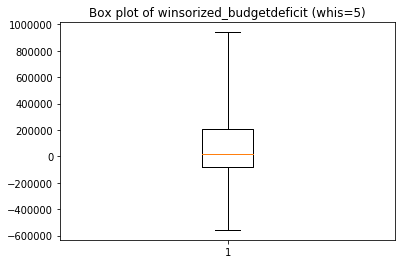

In [18]:
plt.boxplot(winsorized_budgetdeficit, whis=5)
plt.title("Box plot of winsorized_budgetdeficit (whis=5)")

As you can see all outliers eliminated by using winsorized.

5.Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences.

In [19]:
pd.DataFrame({"original_budget": budget_deficit, "winsorized_budget1": winsorized_budgetdeficit,
              "winsorized_budget2": winsorized_budgetdeficit2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.140000e+02,414.000000,4.140000e+02
mean,1.075845e+05,73459.565217,1.614927e+05
std,6.019900e+05,344888.728679,5.806600e+05
min,-1.816932e+06,-557170.000000,-5.400550e+05
25%,-8.343175e+04,-83431.750000,-8.193475e+04
50%,1.460050e+04,14600.500000,1.581900e+04
75%,2.066652e+05,206665.250000,2.121915e+05
max,5.487742e+06,940187.000000,2.190438e+06


Statistical values are varied in differet variables, As shown, mean and median of variables are different because different way of filling missing values.

6.If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question.

The goal is to eliminate outliers and not lose data. Sometimes eliminating outliers through differencing with another variable can give us a better option. After differencing, we are introducing the windor treatment.So the last one is better.